In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from statsmodels.tsa.arima_model import ARIMA
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

ModuleNotFoundError: No module named 'pandas.tools'

In [3]:
data = pd.read_csv("Google.csv",sep=",",parse_dates=['Date'],index_col='Date')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
data.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-17'],
              dtype='datetime64[ns]', name='Date', length=3125, freq=None)

In [5]:
data.loc[data['High']==1228.880000]

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2014-02-26,1224.0,1228.88,1213.76,1220.17,3960400.0,0.0,1.0,613.895035,616.342591,608.759181,611.974105,3960400.0


In [6]:
data.loc[data['High']==101.740000]

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-09-03,100.95,101.74,99.32,100.01,5152400.0,0.0,1.0,50.631294,51.027517,49.81377,50.159839,5152400.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1662ce10>,
      dtype=object)

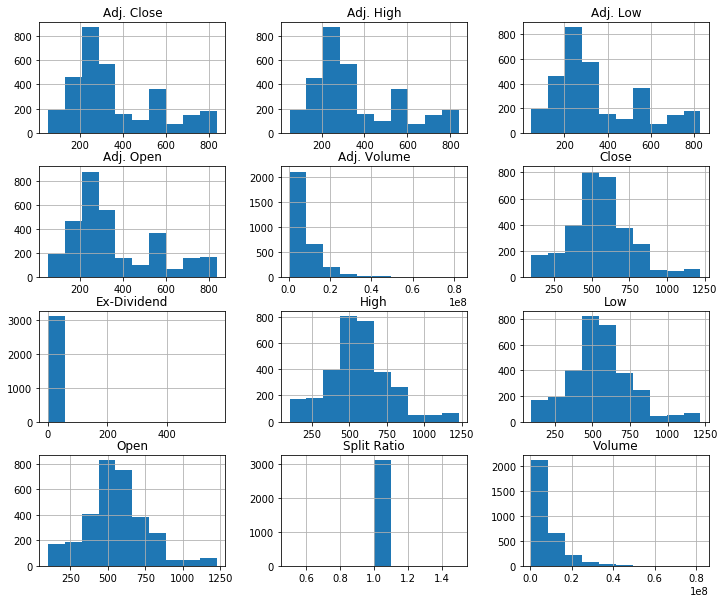

In [7]:
data.hist(figsize=(12,10))

In [8]:
data.corr()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Open,1.000000,0.999705,0.999566,0.999277,-0.526805,0.001177,NaN,0.733222,0.732091,0.733943,0.732733,-0.526805
High,0.999705,1.000000,0.999514,0.999629,-0.523185,0.002026,NaN,0.732420,0.731656,0.733296,0.732334,-0.523185
Low,0.999566,0.999514,1.000000,0.999700,-0.533264,0.001047,NaN,0.733275,0.732299,0.734538,0.733324,-0.533264
Close,0.999277,0.999629,0.999700,1.000000,-0.528669,0.001033,NaN,0.732773,0.732046,0.734033,0.733190,-0.528669
Volume,-0.526805,-0.523185,-0.533264,-0.528669,1.000000,-0.009345,NaN,-0.558889,-0.556840,-0.562534,-0.559904,1.000000
Ex-Dividend,0.001177,0.002026,0.001047,0.001033,-0.009345,1.000000,NaN,0.020027,0.020976,0.019829,0.019881,-0.009345
Split Ratio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adj. Open,0.733222,0.732420,0.733275,0.732773,-0.558889,0.020027,NaN,1.000000,0.999871,0.999809,0.999684,-0.558889
Adj. High,0.732091,0.731656,0.732299,0.732046,-0.556840,0.020976,NaN,0.999871,1.000000,0.999788,0.999835,-0.556840
Adj. Low,0.733943,0.733296,0.734538,0.734033,-0.562534,0.019829,NaN,0.999809,0.999788,1.000000,0.999871,-0.562534


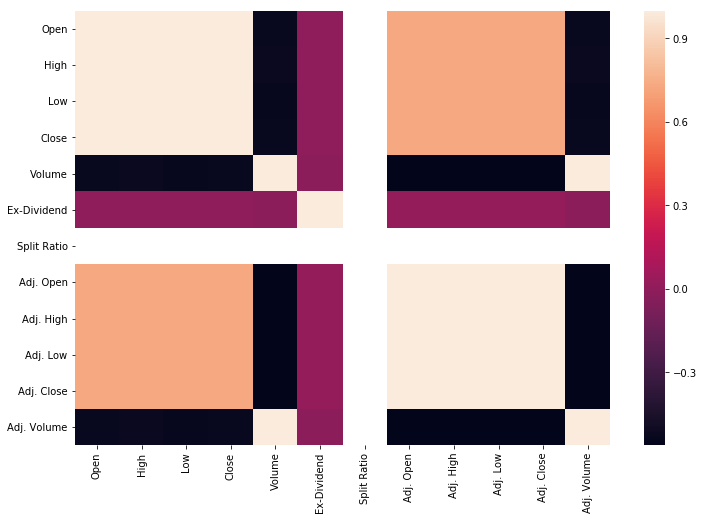

In [9]:
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(data.corr(), fmt="f",ax=ax)

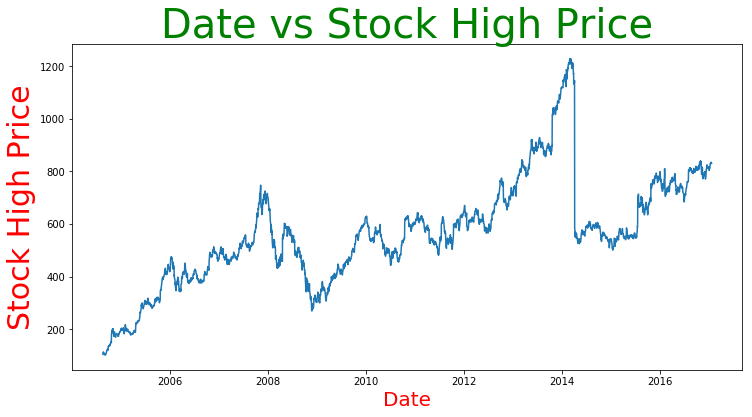

In [10]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['High'])
plt.title("Date vs Stock High Price",fontsize=40,color='g')
plt.xlabel("Date",fontsize=20,color='r')
plt.ylabel("Stock High Price",fontsize=30,color='r')
plt.show()

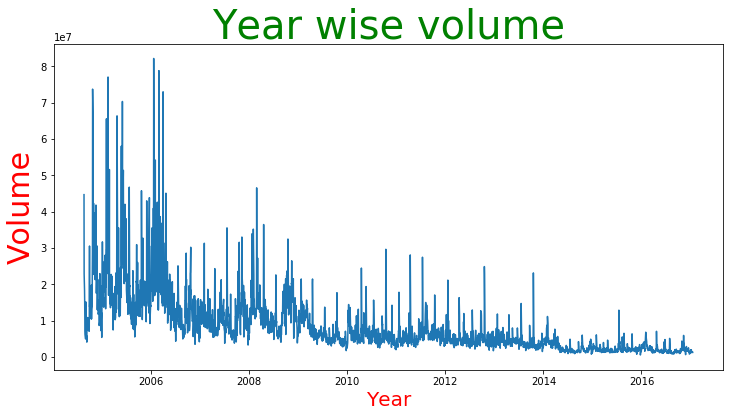

In [11]:
plt.figure(figsize=(12,6))
#Volume	Ex-Dividend	Split Ratio	Adj. Open	Adj. High	Adj. Low	Adj. Close	Adj. Volume
plt.plot(data['Volume'])
plt.title("Year wise volume",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Volume",fontsize=30,color='r')
plt.show()

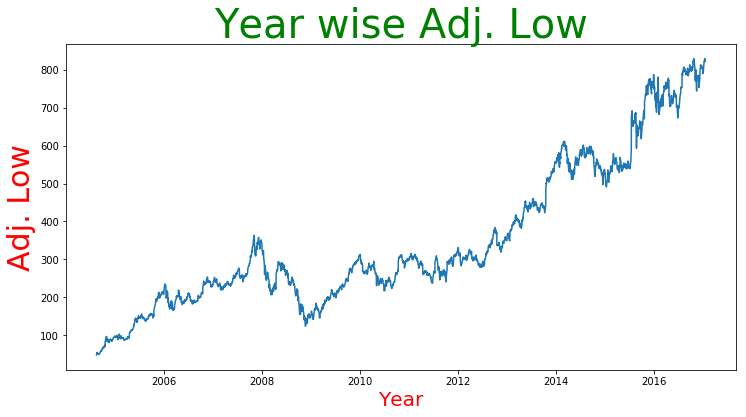

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data['Adj. Low'])
plt.title("Year wise Adj. Low",fontsize=40,color='g')
plt.xlabel("Year",fontsize=20,color='r')
plt.ylabel("Adj. Low",fontsize=30,color='r')
plt.show()

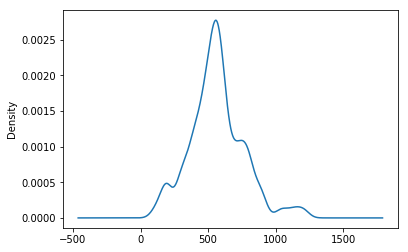

In [13]:
data['High'].plot("kde")

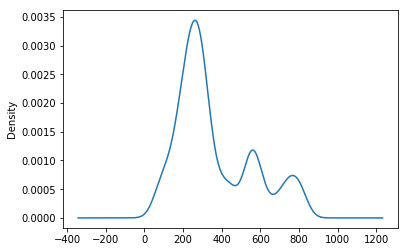

In [14]:
data['Adj. High'].plot("kde")

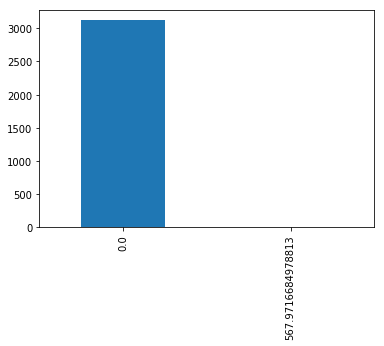

In [15]:
data['Ex-Dividend'].value_counts().plot("bar")

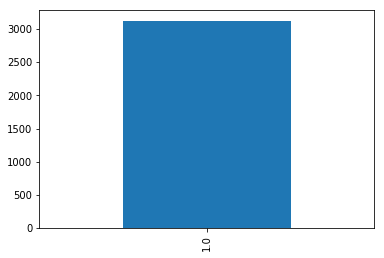

In [16]:
data['Split Ratio'].value_counts().plot("bar")

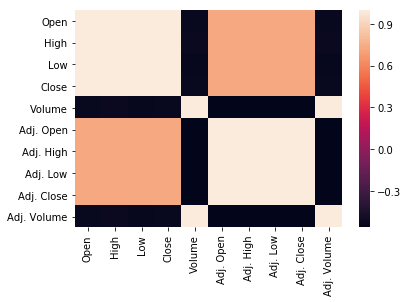

In [17]:
datax= data.drop(['Split Ratio','Ex-Dividend'],axis=1)
sns.heatmap(datax.corr(), fmt="f")

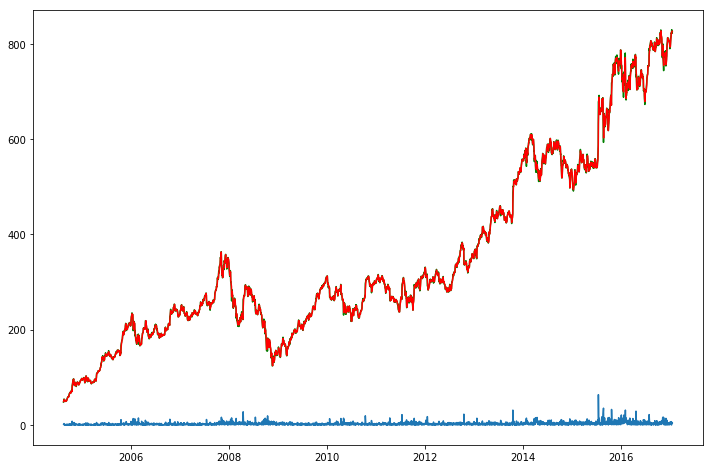

In [18]:
plt.figure(figsize=(12,8))

#gopen = data['Adj. Open']
#ghigh = data['Adj. High']
glow = data['Adj. Low']
#plt.plot(gopen)
#plt.plot(ghigh,color='r')
plt.plot(glow,color='g')
plt.plot(glow.rolling(window=2).mean(),color='r')
plt.plot(glow.rolling(window=2).std())

In [19]:
from pandas.tools.plotting import autocorrelation_plot
plt.figure(figsize=(12,8))
autocorrelation_plot(data)
plt.show()

ModuleNotFoundError: No module named 'pandas.tools'

In [20]:
model = ARIMA(data['Adj. Low'], order=(5,1,0))
model_fit = model.fit(disp=0)
model_fit.summary()

NameError: name 'ARIMA' is not defined

In [21]:
resd = pd.DataFrame(model_fit.resid)
resd.plot()

NameError: name 'model_fit' is not defined

In [22]:
resd.plot(kind='kde')

NameError: name 'resd' is not defined

In [23]:
ds = pd.read_csv("Google.csv")

In [24]:
ds.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
1,2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2,2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
3,2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
4,2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [30]:
from scipy.stats import norm
from math import sqrt
a=(ds[1:31]['Open'])
def one_sided_hypo(sample_mean,pop_mean,std_dev,sample_size,alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value : ', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else: 
        return False
    
alpha = 0.05
sample_size= 30
sample_mean = a.mean()
pop_mean = ds['Open'].mean()
std_dev = a.std()

print("H0: Average duration of talks is less than or equal to population mean")
print("H1: Average duration of talks is grester than population mean")
print('H0: μ <=', pop_mean)
print('H1: μ >', pop_mean)
print('alpha value is: ', alpha, '\n')
reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0: Average duration of talks is less than or equal to population mean
H1: Average duration of talks is grester than population mean
H0: μ <= 560.1715665600002
H1: μ > 560.1715665600002
alpha value is:  0.05 

actual z value :  -264.6198746687786 

Failed to reject NULL hypothesis


In [31]:
from scipy.stats import norm
from math import sqrt
a=(ds[1:31]['Close'])
def one_sided_hypo(sample_mean,pop_mean,std_dev,sample_size,alpha):
    actual_z = abs(norm.ppf(alpha))
    hypo_z = (sample_mean - pop_mean) / (std_dev/sqrt(sample_size))
    print('actual z value : ', hypo_z, '\n')
    if hypo_z >= actual_z:
        return True
    else: 
        return False
    
alpha = 0.05
sample_size= 30
sample_mean = a.mean()
pop_mean = ds['Close'].mean()
std_dev = a.std()

print("H0: Average duration of talks is less than or equal to population mean")
print("H1: Average duration of talks is grester than population mean")
print('H0: μ <=', pop_mean)
print('H1: μ >', pop_mean)
print('alpha value is: ', alpha, '\n')
reject = one_sided_hypo(sample_mean, pop_mean, std_dev, sample_size, alpha)
if reject:
    print('Reject NULL hypothesis')
else:
    print('Failed to reject NULL hypothesis')

H0: Average duration of talks is less than or equal to population mean
H1: Average duration of talks is grester than population mean
H0: μ <= 559.9073419199997
H1: μ > 559.9073419199997
alpha value is:  0.05 

actual z value :  -251.37099114493964 

Failed to reject NULL hypothesis


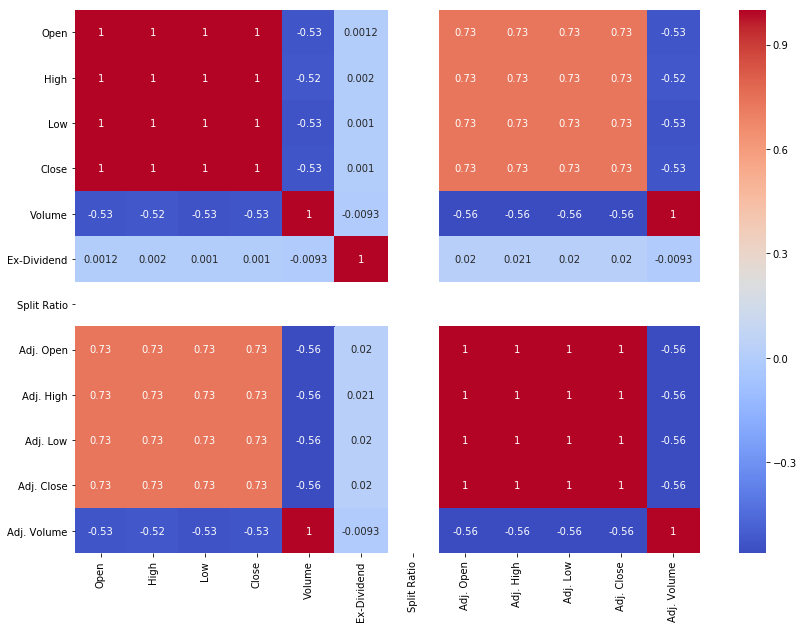

In [32]:
plt.figure(figsize=(14,10))
sns.heatmap(ds.corr(),cmap="coolwarm", annot = True)